<a href="https://colab.research.google.com/github/rubanzasilva/mnist_basics/blob/main/mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [ ]:
#hide
#This imports and sets up everything you will need for this notebook
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np

matplotlib.rc('image', cmap='Greys')

#Under The Hood : Training A Digit Classifier

Here we are going to build a computer vision model from scratch using the famous [MNIST](https://en.wikipedia.org/wiki/MNIST_database#:~:text=Article%20Talk,the%20field%20of%20machine%20learning.) dataset.
This dataset contains images of Handwritten digits and was first used by Yan LeCun to build Lenet5, a handwritten digit classifier.

We do this while introducing the fundamental concepts and tools for deep learning such as

*   How to use NumPy Arrays and PyTorch Tensors
*   Application of broadcasting to them
*   Calculating gradients
*   Definition and choice of a loss function for our problem
*   Updating of the weights using Stochastic Gradient Descent and the role of mini batches.

We finally put all the math together to build a simple neural network to classify images

##Pixels : Computer Vision Foundations

First things first, lets consider how computers handle images.As we shall see later on, for a computer everything has to represented as numbers.
To do this we shall first download the dataset.

For the initial example, We are building a model to classify an image as a 3 or 7. With the code below, we download a sample from the original MNIST dataset which contains images of just these two digits.(3 and 7).


In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
#hide
Path.BASE_PATH = path

Fastai provides a method ls which we can use to see and get a count of whats inside the path directory.

This method returns an object of a special fastai class called L, which has the same functionality as Python's Built-in List but supports advanced functionality such as advanced indexing, additional methods and encourages use of expressive code making it easier to work with Python lists.




In [ ]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

As we can see above, the dataset follows a common pattern for machine learning datasets, where the data is separated into separate train and valid folders.


In [ ]:
(path/'train/3').ls()

(#6131) [Path('train/3/45612.png'),Path('train/3/28760.png'),Path('train/3/38670.png'),Path('train/3/21596.png'),Path('train/3/50000.png'),Path('train/3/43773.png'),Path('train/3/5186.png'),Path('train/3/643.png'),Path('train/3/16019.png'),Path('train/3/40914.png')...]

In [ ]:
(path/'valid/3').ls()

(#1010) [Path('valid/3/6501.png'),Path('valid/3/9305.png'),Path('valid/3/8362.png'),Path('valid/3/5212.png'),Path('valid/3/4277.png'),Path('valid/3/1092.png'),Path('valid/3/9758.png'),Path('valid/3/7436.png'),Path('valid/3/5708.png'),Path('valid/3/5330.png')...]

The training dataset is divided into different folders for the 3's and 7's which contains images of digits for 3 and 7 respectively.The '3s' and '7s' are the labels in this dataset.

Lets us create a sorted list of our images for the 3's and 7's to ensure reproducibility as we shall always get the same order of files.

In [ ]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
valid_threes = (path/'valid/3').ls().sorted()
valid_sevens = (path/'valid/7').ls().sorted()
valid_threes

(#1010) [Path('valid/3/1020.png'),Path('valid/3/1028.png'),Path('valid/3/1042.png'),Path('valid/3/1062.png'),Path('valid/3/1066.png'),Path('valid/3/1067.png'),Path('valid/3/1069.png'),Path('valid/3/1072.png'),Path('valid/3/1092.png'),Path('valid/3/1095.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

We use the Image class from the Python Imaging Library (PIL) to display a sample image from the 3's folder.

Everything in a computer is represented as a number,To represent an image as a number in a computer, We have to convert it to a NumPy array or a PyTorch tensor as shown below.

In [ ]:
im3_array = array(im3)
im3_array[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
im3_array

NumPy indexes from top to bottom and from left to right, as shown above with the 4:10 indicating the rows at the 4th index to the 9th index for both rows and columns.

The same applies to the tensor below.

In [ ]:
im3_tensor = tensor(im3)
im3_tensor[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
df = pd.DataFrame(im3_tensor[4:30,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

Pandas Dataframe has an attribute *df.style* which returns a Styler object which contains methods for building a styled HTML representation of the DataFrame.

The *set_properties* method is used to set CSS properties for the each cell in the dataframe. In this case that is setting the font-size to 6pt for every cell.

The *background_gradient* method is used to add a gradient background color to the DataFrame. The intensity of the color is determined by the value in a particular cell, with the lowest values being specified at the start of the gradient in this case 0 being white and vice versa. In this example, we are using grey which means that our values will range from black to white.

In summary, *set_properties* and *background_gradient* operations above will result in a dataframe with a font-size of 6pt and a gradient background color ranging from black to white.

> Now the first question i had was why cant you use the set_properties method to set the gradient background color as opposed to using the background_gradient method ?

Based on my research, i find out that set_properties can only set a static background color and we would have to write a custom function that calculates the color for each cell based on the value and applies it using set_properties.

After taking a look at how our data looks like, we can go ahead to build a very simple model that recognizes 3's and 7's which we can use as our baseline.


## Baseline Model

A baseline model should be a simple to implement model that you are confident performs reasonably well, which we can use as our lower bound for the models we are building. We check if the models we are building are better than the baseline.

Starting with a simple reasonable baseline helps us ensure that the super complex models we build later on are any good.

### Pixel Similarity

For our baseline model, we can use the idea of **pixel similarity**.

Here we find the average pixel values for every pixel position for all image groups of 3's and 7's giving us two group averages, One representing the group of 3's and another the group of 7's.
This defines what we may call the "**ideal 3**" and the **"ideal 7"**.

To classfify a random image as a 3 or 7, we see which of these two ideal digits the image is most similar to.

We previously saw how to convert an image to a tensor, we do the same and create a plain list of single image tensors of all the images in a directory for example we can convert all the threes in **threes** defined above to tensors.

We use Python list comprehension to do this and below is an example of this.

new_list = [f(0) for o in a_list if o>1].
This returns every element in **a_list** that is **greater than 1** after applying function, **f**.

Let us view one of the images to test that everything is ok, we can view one of the single image tensors using fastai's *show_image* function.



In [ ]:
threes_tensors = [tensor(Image.open(o)) for o in threes]
sevens_tensors = [tensor(Image.open(o)) for o in sevens]
len(threes_tensors), len(sevens_tensors)

(6131, 6265)

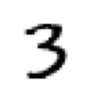

In [ ]:
show_image(threes_tensors[1]);

So to get the average/ideal image for each group, we need to compute the average pixel intensity for every pixel position in an image.
Inorder to do this ,we need to stack all our respective images in a collection for each group together into a single 3d tensor also called a rank 3 tensor that we can perform operations on.Luckily enough, PyTorch provides a function *stack* that can do this for us.


Some common operations such as mean usually require the input to be floats, so we convert all our images in the tensor to float by casting as illustrated below.

Generally when images are floats, pixel values are expected to be between 0 and 1. To do this, we divide the results by the max value of 255.



In [ ]:
stacked_threes = torch.stack(threes_tensors).float()/255
stacked_sevens = torch.stack(sevens_tensors).float()/255
stacked_threes.shape,stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

Here we see that for the threes we have 6131 image examples which is made up of a 28 x 28 matix.

To get our ideal numbers, we want to compute the mean value intensity for every image pixel position in each tensor.To do this we take the mean over the 0th dimension of our rank 3 tensor specified by passing in the argument 0 in the mean function.

This dimension indexes over all images and results in a single average pixel value for every position.

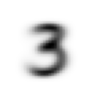

In [ ]:
ideal_three = stacked_threes.mean(0)
ideal_seven = stacked_sevens.mean(0)
show_image(ideal_three);

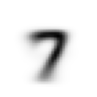

In [ ]:
show_image(ideal_seven);

Now that we have our ideal digits, we can compute our pixel similarity which is the distance from an abitrary image and our ideal image which we are using as our initial baseline.


####Measuring Distance

How do we measure the distance from an abitrary number and an ideal number.One way would be to take the difference between each pixel position value for the abitrary and ideal images and add it up.

If we do this, we notice that some differences are positive while some are negative and this causes the differences to cancel themselves out leading a sitution where an image that is too dark and too light in some postions might be shown as having zero differences from the ideal which is misleading.

To avoid this, there are 2 main ways data scientists measure distance in this context
- You could take the mean of the absolute value of the differences where the absolute value function in this case replaces negative values with positive values. This is called the mean absolute difference or the L1 norm.

- Or we could take the mean of the square of the differences which makes the negative values positive, then take the square root to undo the squaring effect.This is called the Root Mean Squared Error (RMSE) or L2 norm.

So lets now pick a random three from our stacked tensor and get the L1 and L2 norm with the random and ideal number.

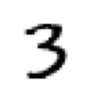

In [ ]:
abitrary_three = stacked_threes[1]
abitrary_seven = stacked_sevens[1]
show_image(abitrary_three);

In [ ]:
#L1 norm
distance_from_ideal_three_l1 = (abitrary_three - ideal_three).abs().mean()
distance_from_ideal_seven_l1 = (abitrary_three - ideal_seven).abs().mean()
distance_from_ideal_three_l1,distance_from_ideal_seven_l1

(tensor(0.1114), tensor(0.1586))

In [ ]:
#L2 norm
distance_from_ideal_three_l2 = ((abitrary_three - ideal_three)**2).mean().sqrt()
distance_from_ideal_seven_l2 = ((abitrary_three - ideal_seven)**2).mean().sqrt()
distance_from_ideal_three_l2,distance_from_ideal_seven_l2

(tensor(0.2021), tensor(0.3021))

We see that in both cases the distance from the abitrary number to the ideal three is less than the distance from the abitrary number to the ideal seven.

This is as expected as the random number was a 3 meaning our simple baseline model gives the right prediction in both cases.

Luckily PyTorch provide both the L1 norm and the L2 norm as loss functions you can import from the torch.nn.functional module. which the PyTorch team recommends importing as F.

In [ ]:
F.l1_loss(abitrary_three.float(),ideal_three),F.l1_loss(abitrary_three.float(),ideal_seven)

(tensor(0.1114), tensor(0.1586))

In [ ]:
F.mse_loss(abitrary_three,ideal_three).sqrt(),F.mse_loss(abitrary_three,ideal_seven).sqrt()

(tensor(0.2021), tensor(0.3021))

So now that we have our baseline model, we need to calculate how good the model is,by this i mean how good the models predictions/ calculations of distance are.We can do this by constructing a metric.

But before we get into this, lets look into the fundamental data structures we are working with, NumPy Arrays and PyTorch tensors.

#### NumPy Array and PyTorch Tensor data structures

Python is a slow language compared to most, anything fast in PyTorch is probably a wrapper of an object written, compiled and optimized in another language, usually C.
C is a low level programming language, which is very fast compared to python.

The fastai book describes Numpy Arrays and PyTorch tensors as follows



> A NumPy array is a multidimensional table of data of the same type. This can be any type i.e. a list, matrix, cube or even an array of arrays (jagged array).If items are all of some simple type e.g. int, floats etc., NumPy arrays can be stored as compact c data structures in memory.NumPy has a wide variety of operators and methods it can use to perform computation on these data structures at the same speed optimized C which is a multitude faster than Python. This is because they are written in optimized C.

> A PyTorch tensor is nearly the same thing as a numpy array, with the exception that the tensor can only be of a basic numerical type / simple type such as int, float etc for example a PyTorch tensor cannot be a jagged array, it will always be a multidimensional rectangular structure. PyTorch tensors can also live on GPU and are also optimized for GPU, meaning they can perform faster computations given lots of values to work with.
PyTorch also supports calculating gradients which is crucial for machine learning as our loss function and weight optimizations are calculated based on the gradients.
As we shall see later on, it would be impossible to do machine learning without this ability.




### Computing Metrics Using Broadcasting

Remember above, we have a baseline model that tells us if a number is a 3 or 7. To do machine learning we need to know how good that model is.

To do this we define a metric which is just a number that tells us how good our model is. We do this using the correct labels of the data and the predictions of the model.

We could use any of our above functions, for example, RMSE as a metric, in this case, we shall use accuracy as the metric as it is more interpretable by the end users.

We want to calculate our metric based on the validation set, as this data has not been seen by the model during training. Calculating our metric based on our training set will inadvertently lead to the model overfitting on the train set data which results in poor results when the model sees new data.
Our baseline model has no training component, hence this doesn't matter but nonetheless, we shall go ahead and use the validation set as a best practice.

Since we already have our ideal value for 3 and 7, we create a stacked tensor as done before using the validation set.


In [ ]:
valid_threes = (path/'valid/3').ls().sorted()
valid_sevens = (path/'valid/7').ls().sorted()

valid_three_tensors = [tensor(Image.open(o)) for o in valid_threes]
valid_seven_tensors = [tensor(Image.open(o)) for o in valid_sevens]

valid_stacked_threes = torch.stack(valid_three_tensors).float()/255
valid_stacked_sevens = torch.stack(valid_seven_tensors).float()/255

In [ ]:
valid_stacked_threes.shape

We want to write a function **is_3**, which classifies a digit by determining which ideal number the arbitrary number is closer to.


For this, we need to define some notion of distance by defining a function that calculates the distance between two images. We do this by defining a function that calculates the mean absolute error for images a and b as we had done before.

In [ ]:
def mnist_distance(a,b):
  return (a-b).abs().mean((-1,-2))

mnist_distance(abitrary_three, ideal_three), mnist_distance(abitrary_three, ideal_seven)

(tensor(0.1114), tensor(0.1586))

In [ ]:
#effect of .mean((-1,-2))

import numpy as np
foo = np.random.randn(4, 3, 2)
# array of 4 numbers and a single number
foo.mean(axis=(-1, -2)), foo.mean()

(array([ 0.34347965,  0.24843096, -0.77618452, -0.40627921]),
 -0.1476382809136289)

You will notice, that we get the same values as previously calculated for these images in distance_from_ideal_three_l1 and distance_from_ideal_seven_l1.

This is the distance from the ideal 3 to the arbitrary number and the ideal 7 to the arbitrary number. We have the distance for one image but we want to calculate the distance between the ideal number and all images in the dataset.


How do we go ahead doing this? Traditionally we could create a Python loop that takes each image tensor in our stack of shape torch.Size([1010, 28, 28]) which represents 1,010 28 x 28-pixel images stacked up and calculates the distance between each one and the ideal digits image tensor.

However, something interesting happens if we define a variable that takes our tensor stacked with all the images as input for our mnist_distance function which we defined to calculate the distance between two images.



In [ ]:
valid_three_distance = mnist_distance(valid_stacked_threes, ideal_three)
valid_three_distance

tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260])

In [ ]:
valid_three_distance.shape

torch.Size([1010])

In [ ]:
valid_stacked_threes.shape,ideal_three.shape

(torch.Size([1010, 28, 28]), torch.Size([28, 28]))

The valid_three_distance results in 1,010 different vector values of distance for every image tensor in the stack as opposed to returning an error complaining about mismatching shapes.

The trick here is broadcasting.When we perform a simple calculation such as (a-b) on two tensors of different ranks, Broadcasting expands the smaller tensor in memory, to have the same size as the larger tensor.

After broadcasting , PyTorch does its usual element wise subtraction.Lets take an example


In [ ]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

This results in tensor([2,3,4]) which looks like an element-wise addition.

PyTorch in this case treats tensor(1) as if it were three copies of the same tensor. Similarly mean3, a rank 2 tensor representing a single image is treated as if it were 1,010 copies of the same image. It then subtracts each copy from an image in our valid_threes_dist calculating the distance between every 3 in the validation set and the ideal 3 resulting in 1,010 different versions.

When PyTorch performs broadcasting, it doesn't copy the image 1,010 times. It just pretends that a tensor is of that shape but it doesnt allocate any memory for this.

PyTorch performs the whole computation in C code, and CUDA on GPU which is just C for GPU resulting in performance thousands of times faster than using pure Python and millions of times faster on GPU.
This is true of all broadcasting and element-wise operations and functions done in PyTorch.

In our function mnist_distance, we see .abs() which applies the method to every resulting element in a tensor returning a tensor that contains 1,010 absolute values.

Then finally we call .mean((-1,-2)) which contains a tuple of (-1,-2) which are a range of axes that represents the last and second last elements. This tells PyTorch that we want to take the mean ranging over values indexed by the last two axes of the tensor, which are the horizontal and vertical dimensions of an image.

After this we are left with the first tensor axis which takes the mean over all images in the tensor, meaning we calculate the average intensity of all pixels for an image.


####**is_3**

We now define a function is_3 to determine whether an image is a 3 or a 7.

We can use mnist_distance defined above to check whether an image is a 3 or 7 by using the following logic, if the distance between the selected image and the ideal 3 is less than the distance to the ideal 7, then the number is a 3.

We define a function is_3 with the above logic

In [ ]:
def is_3(x):
    return (mnist_distance(x,ideal_three) < mnist_distance(x, ideal_seven))

def is_7(x):
  return (mnist_distance(ideal_seven, x) < (mnist_distance(ideal_three, x)))

is_3(ideal_three),is_3(ideal_seven)

Using a comparison or logical operator in a return statement of a function returns a boolean True Or False

When the above value is converted to float, the function returns 1 for True or 0 for false.

In [ ]:
is_3(ideal_three).float(), is_3(ideal_seven).float()

(tensor(1.), tensor(0.))

We can now run is_3 with the stacked_tensor of all images in it.This function will automatically apply broadcasting and run this function element-wise for every image tensor.

In [ ]:
is_3(stacked_threes), is_3(stacked_threes).float()

(tensor([True, True, True,  ..., True, True, True]),
 tensor([1., 1., 1.,  ..., 1., 1., 1.]))

In [ ]:
is_3(valid_stacked_threes), is_3(valid_stacked_threes).float()

(tensor([ True,  True,  True,  ..., False,  True,  True]),
 tensor([1., 1., 1.,  ..., 0., 1., 1.]))

We take the average for all threes in the stacked tensor to get the accuracy for all the threes image tensors.
To get the accuracy for the sevens, we take the inverse of the same function.

In [ ]:
accuracy_threes = is_3(valid_stacked_threes).float().mean()
accuracy_sevens = ( 1 - is_3(valid_stacked_sevens).float() ).mean()
accuracy_sevens_a = is_7(valid_stacked_sevens).float().mean()
accuracy_threes, accuracy_sevens, accuracy_sevens_a, (accuracy_threes + accuracy_sevens_a)/2


(tensor(0.9168), tensor(0.9854), tensor(0.9854), tensor(0.9511))

So we see we are getting over 90% accuracy for our model when classfying digits 3 and 7.

But 3 and 7 are only 2 numbers and they also look quite different, we need to build a system that contiunuosly improve and is more robust.As we see our baseline pixel similarity model has no way to improving or learning.

Lets try buidling a model that learns from previous predictions and automatically modifies itself to improve performance.We are now going to see how we can train a model to learn.

In [ ]:
def is_test(a,b,c):
  return ((a-b) < (a-c))

is_test(6,8,4)

True

In [ ]:
is_test.float()

### Stochastic Gradient Descent

Building a model that continously improves.

In 1962, Arthur Samuels described machine learning in his classic essay "Artificial Intelligence: A frontier of automation". Here he suggests that instead of telling a computer the exact steps needed to solve a problem like regular programming, we could just show the computer, a number of examples and let it figure out how to solve a problem itself. This indeed turned out to be a powerful idea, as was later shown.

Arthur Samuel's basic idea was


> Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.

This spells out some powerful concepts
- The idea of weight assignment
- The fact that weight assignment has some actual performance that can be tested
- The idea that there needs to be an automatic means of testing the weight assignment
- The need for an automatic means of improving the performance by altering the weights


This is the key to building a model that continuously gets better, unfortunately our pixel similarity lacks a learning mechanism, meaning it cannot continuously get better.

To take advantage of deep learning, we represent the problem in the form Arthur Samuels described above.
To do this, we use the concepts of weights, instead of calculating the distance between the pixels of an image and the ideal image, we assign weights to each pixel whereby the highest weights are associated with the pixels that are most likely to be black.

> For instance, pixels toward the bottom right are not very likely to be activated for a 7, so they should have a low weight for a 7, but they are likely to be activated for an 8, so they should have a high weight for an 8. This can be represented as a function and set of weight values for each possible category—for instance the probability of being the number 8

This can be represented as a function and a set of weight values for each category, for example the probability of being an 8 can be represented as below


In [ ]:
def pr_eight(x,w):
    return (x*w).sum()

Here we assume that the x is an image with the rows stacked up into one line as a single tensor. w, represents the weights. With this we just need to update the weights in such a way that the model improves, we continuously improve the weights until we can't improve them any more, or we reach the selected number of epochs/iterations. We want the values of w to be high for numbers that are actually 8 and low for numbers that are not. With this just need to find the best weights for 8 to come up with the best function that can recognize 8's.

To find the above function into a machine learning classifier, we follow the specific steps
1. We initialize the weights
2. Using set weights, we calculate whether an image is a 3 or 7 and get predictions
3. Using predictions from step 2, we calculate our loss which tell us how good our predictions are
4. Based on the above loss, we calculate our gradients, which tell us how changing the weights affects the model
5. Based on above gradients, we change the weights in the direction that improves the model
6. Go back to step 2, and repeat the process
7. Iterate until you usually stop because the model is good enough, or you are tired of waiting

These steps are illustrated as shown below

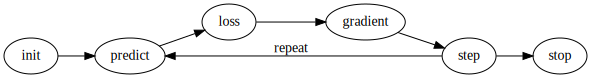

In [ ]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')


There are several ways to perform the seven steps listed above, but they all follow some general guidelines.

- Initialize: we usually initialize the parameters to random values, and because we have a means of automatically improving the weights, it means we shall iterate towards the correct weights no matter where we start at

- Loss : This refers to the means of testing the effectiveness of any current weight assignment in terms of actual performance such that the function returns a small number if the performance is good.

- Step : How do we know if we are taking the step in the right direction, we can try adjusting the loss in any direction and see if the loss goes up and down. With this, we have the direction and we take a step in the direction using different intensities until we find which amount works best.

Calculating gradients gives us an exact direction and number in which to adjust our weights.

lets illustrate the above steps with a simple toy example where we assume that a quadratic function can work as as our loss function and x as the weight parameter.


In [ ]:
def f(x):
    return x**2

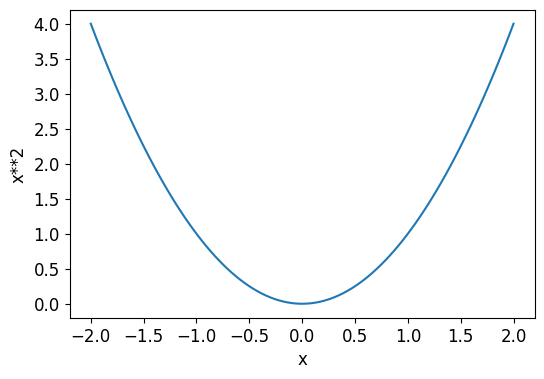

In [ ]:
#Lets plot the following equation
#help(plot_function)
plot_function(f, 'x', 'x**2')

The sequence of the 7 steps starts by picking or initializing the weight with a random parameter value and calculating the loss. Here we use -1.5 and calculate the loss.

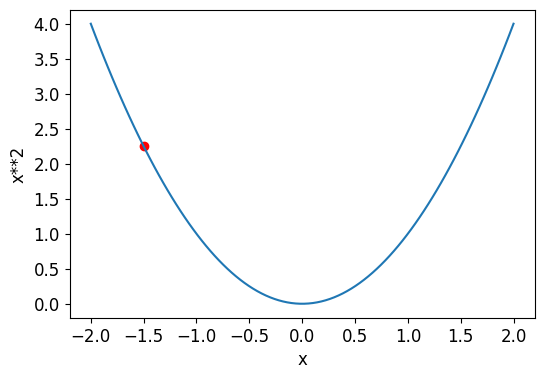

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5,f(-1.5), color="red")

We see how well our parameter value does and pick another value in the direction that improves the slope, lets try picking a higher and lower value to see which direction gets closer to the optimal point.

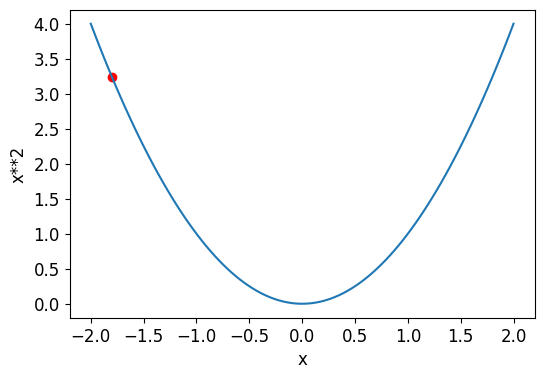

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.8,f(-1.8), color="red")

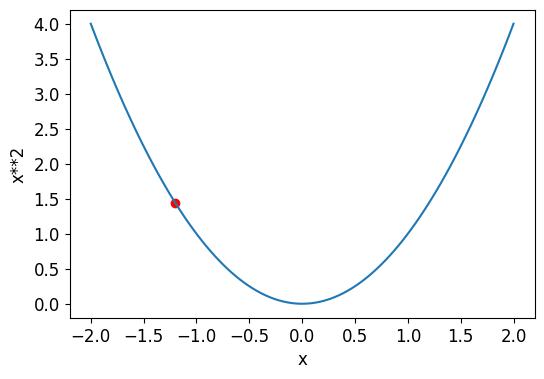

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.2,f(-1.2), color="red")

With this, we see that taking lower values moves us closer to the lowest point on the curve, with this we continuously adjust our weights in the right direction until we reach the lowest point on the curve which minimizes the loss.

We can optimize functions regardless of how complex they are this way with gradient descent until we reach the optimal point.


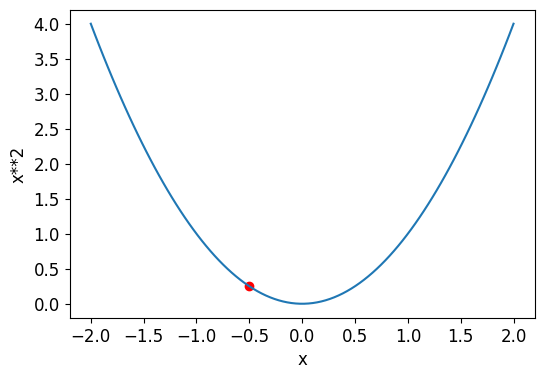

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-0.5,f(-0.5), color="red")

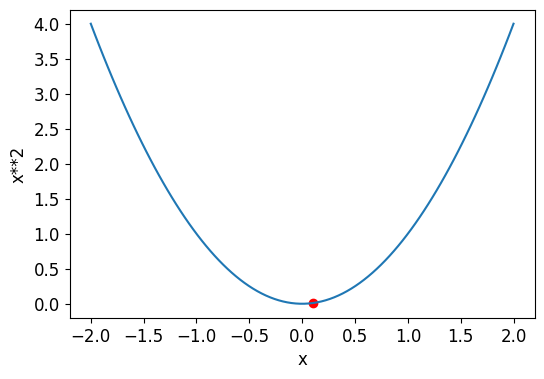

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(0.1,f(0.1), color="red")

### Gradients

Instead of manually adjusting the weight value, we can use calculus as a performance optimization. This tells us by how much our loss will go up or down if we adjust our parameter in a given direction.

With this, this tells us in which direction to adjust our weight and by how much.

From calculus, we know that a derivative of a function tells us how much a change in its parameters changes the result of a function. For any given function such as our quadratic function above, we can calculate its derivative which is just another function. We should note that the derivative of a function calculates the rate of change of the function not the value of the function.

For example the derivative of our quadratic function at parameter value 3 tells us how much the quadratic function changes at 3. Once we know how our value changes, we know what direction to adjust our weights in to make the function smaller.
This is the key to machine learning, having a way to adjust the parameters to improve the model. Calculus provides a computational shortcut which lets us calculate the gradients of a function.These tells us which direction and by how far to adjust our weights.

Remember that our function has a lot of weights that we need to adjust.Intrestingly enough, we can calculate the gradient for each weight while taking the rest constant, then do this for each weight using broadcasting.

We dont need need to calculate the gradients manually as PyTorch can do this for us as we shall see below.

Say we want the gradients at tensor value 3.

In [ ]:
xt = tensor(3.).requires_grad_()

requires_grad_() tells pytorch to calculate gradients with respect to the variable at the value 3. We go ahead and compute our function f(x) defined above at the value 3.

In [ ]:
f(3)

9

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

Notice how when we compute the function using xt which has been told to track gradients, it returns the normal result of a function alongside the grad_fn wich it will be using to compute gradients for us when needed.

Calling backward() on the result of the function,yt asks PyTorch to calculate for us the gradients at that value.

In [ ]:
yt.backward()

> The backward here refers to backpropagation which is the name given to the process of calculating the derivative for each layer.This is called the backward pass of the network as opposed to the forward pass where activations are calculated.

We can view the gradients of a model by calling .grad on the result of the function f(xt) where xt was assigned requires_grad_() in the original initiliazing which tells PyTorch to keep track of the gradients.






In [ ]:
xt.grad

tensor(6.)

Per calculus, the derivative of x**2 is 2*x, and since we have x = 3, the gradient value should be 2 * 3 = 6, which is the same as the gradient value we got above.

Now we can calculate derivatives while passing in a list of values as an argument to simulate our tensor having multiple weights. To ensure we return a scalar value for our loss function result, we add sum to the definition of the loss function f(x).

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x):
  return (x**2).sum()

In [ ]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor([ 6.,  8., 20.])

Calculating gradients only gives you the slope of the function; it doesn't actually tell you how far to adjust the parameters.

But looking at the gradients gives us an idea of how far to make our adjustments. If the slope is large, then this suggests that we have many steps to take, while if the slope is small, this suggests we are closer to the optimal value and have fewer adjustments to make.

### Stepping with learning rate

After calculating the gradients, we now have to adjust our weights. The most common way to do this is to multiply the gradients by an arbitrary number called the learning rate. This is often a number between 0.001 and 0.1, though it can be anything.


Often, people select a couple of learning rates, see which one results in the best model after training, and use that. There are automated solutions for this, such as the Fastai learning rate finder.

Once you have picked your learning rate, you can adjust the weights using the simple calculation for w shown below.

In [ ]:
w = -gradient * lr
#w = w - (gradients*lr)

In [ ]:
lr = 0.01

In [ ]:
w = w - (xt.grad * lr)

In [ ]:
w

This is what we call stepping your parameters using an optimizer step. We also subtract the gradient *LR from the parameter to update it. This allows us to adjust the parameter in the direction of the slope by taking the negative of the gradient and multiplying it by the learning rate.

Moving the weights in the direction of the slope allows us to minimise our loss function.

In [ ]:
w -= xt.grad * lr

In [ ]:
w

Picking a learning rate that is too low will result in taking too many steps, while a learning rate that is too high also results in poor performance, as this results in a lot of bouncing around, and the model might even skip the optimal point.

To show all the above concepts, let's apply the above steps to an example.

###Example

Here we use the gradients to find the minimum, and then we look at how finding a minimum can be used to train a model to better fit the data.

To show this, let's define a simple example.

Imagine you are measuring the speed of a roller coaster as it goes over a hump and descends back down.

The roller coaster would start fast, getting slower as it climbed the hill; it would be slowest at the top, then slowly accelerate and pick up speed as it descends the hill.

So we want to build a model of how speed changes over time. If we were to manually measure the speed of the roller coaster every second for 20 seconds, it might result in something resembling this.

In [ ]:
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

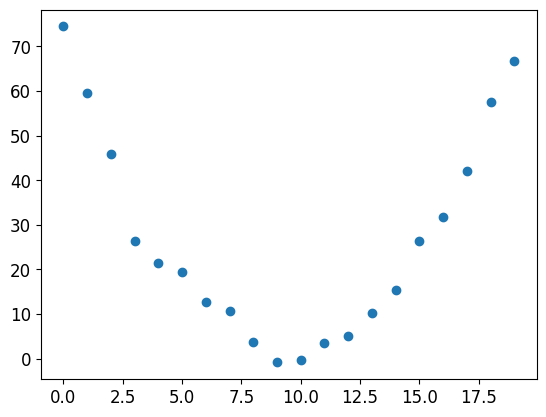

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

Using stochastic gradient descent, we can try to find a function that matches the data. We can't consider every possible function, so let's take a guess that the function will be a quadratic in the form ax**2 + bx + c which is represented as

a(time)**2 + b(time) + c

In [ ]:
#function that takes input and parameters as input and returns a prediction
def f(t, params):
    a,b,c = params
    return a*(t**2) + b*t + c

We distinguish clearly between the function's input, the time when we are measuring the roller coaster's speed, the parameters, and the values that define the function we are trying.

What we have done is restrict our problem of finding the best quadratic that fits to finding the best parameter values for a, b, and c. This simplifies our problem as every quadratic is fully defined by three parameters (a, b, and c).
In order to find the best quadratic function, we must find the best values of a, b, and c.

If we can solve the problem of finding the best three parameters of the quadratic, we can apply the same logic to more complex functions with more parameters, such as a neural net. So we find the parameters for f and then do the same thing for the MNIST dataset with a neural network.

We also need to define what we mean by best values. We do this by choosing a loss function that takes in as input the prediction and target and returns a value, where lower values of the function correspond to better predictions and vice versa.

For the above continuous data, we shall use the mean squared error.

In [ ]:
#loss function
def mse(preds,targets):
    return ((preds - targets)**2).mean()

We now go through our seven step process

In [ ]:
#intialize and tell pytorch to compute gradients
params = torch.rand(3).requires_grad_()
orig_prams = params.clone()

In [ ]:
params

tensor([0.5779, 0.9040, 0.5547], requires_grad=True)

In [ ]:
#Calculate predictions
preds = f(time, params)
preds

tensor([  0.5547,   2.0366,   4.6743,   8.4679,  13.4174,  19.5227,  26.7839,  35.2009,  44.7737,  55.5025,  67.3870,  80.4274,  94.6237, 109.9758, 126.4838, 144.1476, 162.9673, 182.9428, 204.0741,
        226.3614], grad_fn=<AddBackward0>)

In [ ]:
len(preds)

20

In [ ]:
def show_preds(preds, ax=None):
 if ax is None: ax=plt.subplots()[1]
 ax.scatter(time, speed)
 ax.scatter(time, to_np(preds), color='red')
 ax.set_ylim(-300,100)


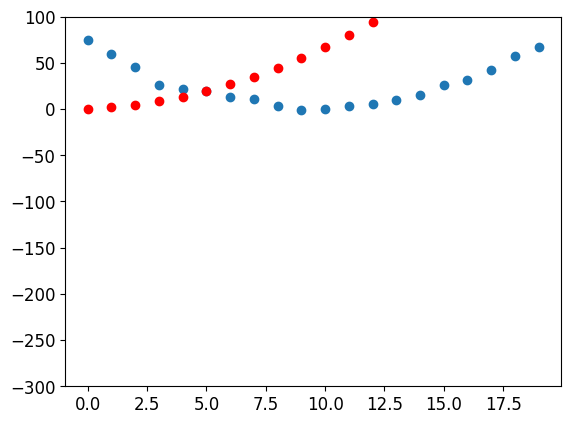

In [ ]:
show_preds(preds)

show_preds below plots the preds against the actual target values for time and speed, this results in two scatter plot with two sets of points with the red representing the preds and vice versa.

Our plot shows a variance between the preds and the targets, so we calculate the loss which lets us know how good our model is.

In [ ]:
#calculate the loss
loss = mse(preds,speed)
loss

tensor(7761.0767, grad_fn=<MeanBackward0>)

Remember, the loss is a number we want to improve and minimize. To do this, we calculate our gradients, which tell us how to move in order to minimize our loss.

In [ ]:
#calculate gradients
loss.backward()
params.grad

tensor([28189.2148,  1824.8007,   107.8606])

In [ ]:
lr = 1e-5

In [ ]:
params

tensor([0.5779, 0.9040, 0.5547], requires_grad=True)

params.data contains the parameter values defined above in params allowing us to inspect and modify the parameter values.

In [ ]:
i = params.data
i

tensor([0.5779, 0.9040, 0.5547])

In [ ]:
u = params.grad.data
u

tensor([28189.2148,  1824.8007,   107.8606])

In [ ]:
params.grad * lr

tensor([0.2819, 0.0182, 0.0011])

In [ ]:
i2 = params.data
i2

tensor([0.5779, 0.9040, 0.5547])

Step the weights

In [ ]:
#lr = 0.05
params.data = - lr * params.grad.data

In [ ]:
#new params after adjustmemt
#params.data represents the initial parameters
#params.grad.data represents the gradients of these initial paramters
# lr * params.grad.data changes multiplies the gradients of the parameters by a learning rate
#params.data = - lr * params.grad.data sets the initial parameters to the result of gradients * lr
#
i = params.data
i

tensor([-0.2819, -0.0182, -0.0011])

In [ ]:
#step
lr = 1e-5
params.data = - lr * params.grad.data
params.grad = None

In [ ]:
#go back to step 2
preds = f(time,params)
loss = mse(preds, speed)
loss

tensor(5674.8853, grad_fn=<MeanBackward0>)

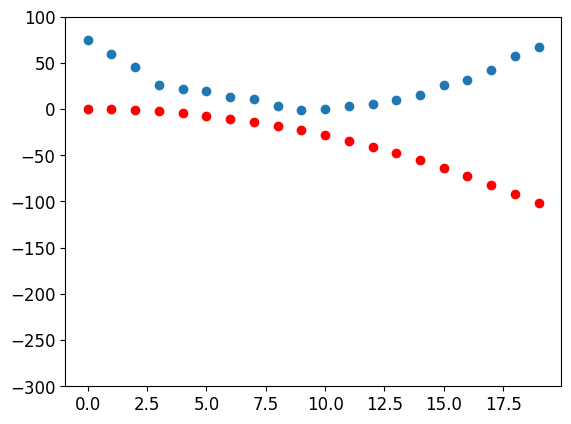

In [ ]:
show_preds(preds)

We now know how to update the parameters, so we create a function to do one step

In [ ]:
def apply_step(params,prn= True):
    preds = f(time,params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -=  lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

Repeat

In [ ]:
for i in range(10):
    apply_step(params)

5674.88525390625
1642.954833984375
879.9871215820312
735.607177734375
708.2830810546875
703.1094970703125
702.1275024414062
701.9385986328125
701.9000244140625
701.8897094726562


In [ ]:
orig_prams

tensor([0.5779, 0.9040, 0.5547], grad_fn=<CloneBackward0>)

In [ ]:
params = orig_prams.detach().requires_grad_()


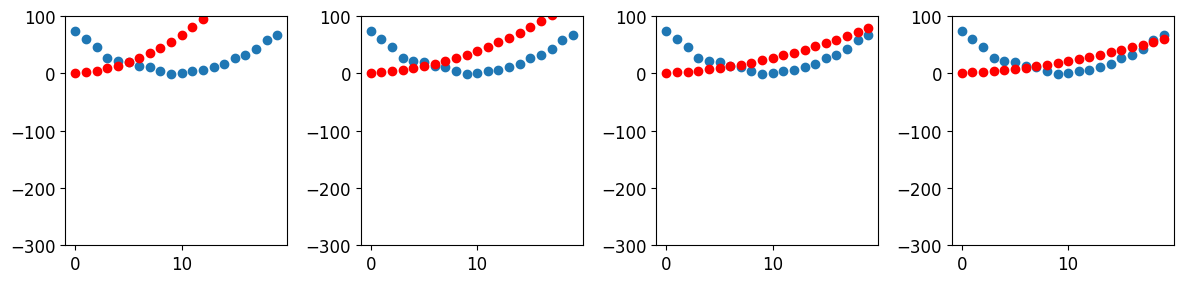

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

To summarize, at the beginning, we initialize the weights to random values since we have means of improving them, or we can use weights from a pretrained model.
In the first iteration, the initial weights won't be as good as in the second case.

Once we have weights, we can use them to calculate a prediction. We then compare our prediction with our target, which in this case is our labels, which we already have as we are using a labelled dataset.
This gives us a number, which we refer to as our loss. This measures the distance between the predictions and the target to tell us how good our model is.
We now have a number that we want to make as low as possible, as low values of loss correspond with better predictions.

We can make the loss as low as possible by adjusting the parameters of the model, also called the weights, in the direction that minimizes the loss.
Calculus gives us a way to calculate which direction to adjust our weights in, calculating the gradients of the above. We adjust the weights by taking the gradients and multiplying them by a small learning rate. We then continuously iterate until we reach the lowest point.

All the above steps can be transposed and applied to the MNIST dataset, except for the loss function. So let's now build a loss function for our MNIST dataset and apply the seven steps.


##MNIST LOSS FUNCTION

We already have the independent variables, x, which are the images themselves. We concatenate them into a single tensor and also change them from a list of matrices to a list of vectors, changing the shape of the tensor in the process.

Furthermore, we do this using .view(), a PyTorch method that changes the shape of a tensor without changing its content.

-1 is a special parameter for -1 that tells PyTorch to make this axis as big as necessary to fit all the data.

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)

In [ ]:
#train_x = torch.cat([all digits]).view(-1,28*28)

We also need labels for our dataset, in this case we use 1 for the 3's and 0 for the 7's.

In [ ]:
#unsqueeze(1) adds an extra dimension of 1 to the train_y
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [ ]:
#train_y = tensor([0]*len(zeros) + [1]*len(ones) + [2]*len(twos)).unsqueeze(1)

In [ ]:
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

A data set is supposed to return a tuple of (x,y) when indexed. We can use the zip function, which, when combined with the list function, provides a simple way to return this.

The list and zip functions, when combined and passed in lists of values as arguments, combine the lists into a single list of tuples, where each tuple contains one element from each of the lists.

In this case, our first list contains the examples and input features, and the second list contains the labels, for example.

In [ ]:
# Let's say we have these two lists:
train_x_example = ['feature1', 'feature2', 'feature3']
train_y_example = ['label1', 'label2', 'label3']

# We can zip them together like so:
dset_example = list(zip(train_x_example, train_y_example))

# And now, dset looks like this:
#[('feature1', 'label1'), ('feature2', 'label2'), ('feature3', 'label3')]
dset_example

[('feature1', 'label1'), ('feature2', 'label2'), ('feature3', 'label3')]

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y


(torch.Size([784]), tensor([1]))

In [ ]:
Image.open(valid_threes[1])

In [ ]:
valid_threes[1].shape

In [ ]:
valid_x = torch.cat([valid_stacked_threes, valid_stacked_sevens]).view(-1,28*28)
valid_y = tensor([1]*len(valid_threes) + [0]*len(valid_sevens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))


Sevens steps

In our first step, we define a function that initializes all the weights to random numbers for each weight.

In [ ]:
#initiliaze parameters
def init_params(size,std=1.0):
    return (torch.randn(size)*std).requires_grad_()

std in the init_params function provides more variance in the parameters though this does nothing as it is a 1.

std also helps balance the scale of the initial weights, helping stabilize the training process and improving the performance of the model.


In [ ]:
weights = init_params(28*28,1)

In [ ]:
weights.size()

torch.Size([784])

The function weights * pixels won't be flexible enough, as it always returns 0 when a pixel value is 0. The formula for a line is y = mx + b, meaning we still need a b variable.
We initialize it to a random number too.

In [ ]:
bias = init_params(1)
bias

tensor([0.3472], requires_grad=True)

In a neural network, the w represents the weights and the b represents the bias, and together the weights and biases represent the parameters of a neural network.

In [ ]:
#prediction for 1 image
pred = (train_x[0]*weights.T).sum() + bias
pred

<ipython-input-26-6ba6bfab5841>:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  pred = (train_x[0]*weights.T).sum() + bias


tensor([-6.2330], grad_fn=<AddBackward0>)

NB: .T seems to be depreceated for tensors of dimensions other than 2. In out case we can continue to use it as our tensor is 2D.

/tmp/ipykernel_550/1078514746.py:2:

 UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release.

Consider `x.mT` to transpose batches of matrices

or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor.

(Triggered internally at /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1696859728060/work/aten/src/ATen/native/TensorShape.cpp:3571.)
  (train_x[0]*weights.T).sum( + bias))



While we could use a Python for loop to calculate the predictions for each image, Python for loops do not run on GPUs, and because Python is also a slow language for loops in general, we need to represent as much of the calculation in a model using higher-level functions when possible.

We use matrix multiplication, which calculates the w*x for each row of a matrix. This is represented in Python as an @ operator, as shown below.

In [ ]:
#a function to return predictions for all images
def linear1(xb):
    return xb@weights + bias

In [ ]:
#shoudl give us the same answer as pred
preds = linear1(train_x[0])
preds,pred

(tensor([-6.2330], grad_fn=<AddBackward0>),
 tensor([-6.2330], grad_fn=<AddBackward0>))

In [ ]:
preds = linear1(train_x)
preds

tensor([ -6.2330, -10.6388, -20.8865,  ..., -15.9176,  -1.6866, -11.3568], grad_fn=<AddBackward0>)

In [ ]:
preds.shape

torch.Size([12396])

In [ ]:
def is_0(x):
  return (x == 0)

In [ ]:
is_0(pred)

tensor([False])

This equation, batch@weights + bias, is one of the two fundamental equations in deep learning, with the other being the activation function.

Let's check our accuracy. To decide whether the numbers are 3 or 7, we just check whether they are greater than 0, and our accuracy for each image is calculated using broadcasting (no loops) as shown below.

So remember, we gave our train_y labels of 0 for the seven's and 1 for the three's. We build a function that checks whether the image is greater than o and then checks the label to see if it is a 0, and if so, the number is most likely to be a 3.


In [ ]:
corrects = (preds > 0.0 ).float() == train_y
corrects

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])

In [ ]:
corrects.shape

torch.Size([12396, 12396])

In [ ]:
corrects.float().mean().item()

0.5040026903152466

In [ ]:
#change one weight and calucalate the new accuracy
#torch.no_grad tells pytorch not to calculate gradients
with torch.no_grad():
    weights[0] *= 1.0001
    preds = linear1(train_x)
    ((preds>0.0).float() == train_y).float().mean().item()

To improve our model using SGD, we need to calculate gradients, which means we need a loss function that represents how good our model is.
The gradients are a measure of how the loss function changes with respect to the change in weights, so we definitely need a loss function.

One option would be to use accuracy, which would get the prediction for one image for every image in the dataset, calculate the average accuracy over the whole dataset and then calculate the gradients for each weight of an image with respect to the overall accuracy.

As we shall see below, accuracy doesn't respond to small changes in the weights, hence it won't be useful as a loss function.

The gradient of a function is its slope or steepness, i.e., rise over run, which is how much the value of the function goes up or down divided by how much the input changed. (y_new - y_old)/(x_new - x_old).


This gives us a good approximation of the gradients when x_new is very similar to x_old, meaning their difference is very small. But accuracy only changes when a prediction changes from 3 to 7, or vice versa.


The only problem is that a small change in weights from x_old to x_new isn't likely to cause any prediction change, so y_new-y_old will almost always be 0, making the gradient 0, which is not a number a model can learn from.
Basically, a small change in weights doesn't result in a change in prediction; hence, the gradient at that point will almost always be zero until the prediction changes. This number 0 doesn't teach the model anything.


We need a loss function that, when our weights result in slightly better predictions, gives us a slightly better loss. In this case, if the answer is a 3, the answer is a little higher, and if the answer is a 7, the loss is a little lower.


Let's write this function that takes in the predictions as input. Let's make an argument prds of values between 0 and 1, where each value is the prediction that a number is a 3.
Let's make another argument trgts which are the targets between 0 and 1, which tells whether an image is a 3 or not.
A loss function calculates the difference between the predicted images and the targets.


"initialize params, make preds, calculate the loss, i.e., distance between pred and target, get gradients, update params based on grad, repeat.".


For instance, we might have three numbers, which are 3, 7, and 3. We pass these to the model, which returns a prediction of (0.9) for the first, where the model predicted with high confidence that the value was a 3, the second value is a (0.4), where the model was fairly confident that the number was a 7, and with fair confidence but incorrectly that the last was a 7 (0.2). Since 0.9, 0.4, and 0.2 are the predictions, we pass these to the model as input.

#Grammar checkpoint

In [ ]:
trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

In [ ]:
def mnist_loss(predictions, targets):
    return torch.where(targets == 1, 1-predictions, predictions).mean()

This calculates the distance between the target and 1 if it is supposed to be a one and the distance to 0, if its is supposed to be a 0. We then take the mean of those distances.

Lets try it on our prds and tgts

In [ ]:
torch.where(trgts == 1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
mnist_loss(tensor([0.9,0.4,0.2]),trgts)

tensor(0.4333)

In [ ]:
mnist_loss(prds,trgts)

tensor(0.4333)

This function returns a lower number when the predictions are more accurate, when accurate predictions are more confidentand when inaccurate predicitons are less confident.We take the mean to give us a scalar for the final loss.With loss, a low number is always assuemned to be better i.e if we changed our last p[rediction from 0.2 to 0.8 inidcating high confidence in the number being a three our loss goes down as shown below.

In [ ]:
mnist_loss(tensor([0.9,0.4,0.8]),trgts)

tensor(0.2333)

Sigmoid

Currently we see that with our mnist loss function, we assume that the preds are between 0 and 1. we need to ensure that is true.

Luckily enough, there is a function called sigmoid that does just that.

The sigmoid function always outputs a number between 0 and 1.It takes in any value as input and squishes it into a value between 0 and 1.

It is defined as follows

In [ ]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [ ]:
help(sigmoid)

Help on function sigmoid in module __main__:

sigmoid(x)



Luckily enough PyTorch defines an accelerated version of the sigmoid function for us, so we dont need to define one.This is a commonly used function in deep learning as we usually want to ensure our predictions are between 0 and 1.

We can plot the function to see it looks.

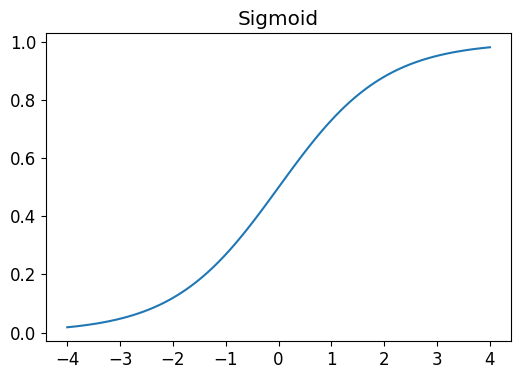

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
help(plot_function)

Help on function plot_function in module fastbook:

plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6, 4))



As we can see the above function has values between 0 and 1 and takes any value and squishes into an output value between 0 and 1. It is a smooth curve that goes up, which is the type of function that gives us meaningful derivatives.This means that the function responds to small changes in the gradients.

With this we update our mnist function applying sigmoid to the inputs as shown below

In [ ]:
#calculates distance from 1 if target is 1,and distance from 0 if target is 0.
def mnist_loss(predictions,targets):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

With this our loss function will work even the predictions are not between 0 and 1. All that is required is that higher values of predictions correspond to s higher confidence an image is a 3.

We already have a metric so the question would be why did we define a loss function ?

A metric is used to drive human understanding of how our model is actually performing while a loss function is to drive machine learning.To drive automated learning we need a function which returns meaningful derivatives and responds to small changes in the confidence level.
This means that sometimes the loss function is not exaclty an approximation of what we want to achieve, but a compromise between the real goal and a function that can be opimtimized with gradients.

The loss function is calculated for every item in the dataset and the end of our epoch the loss values are averaged to give us a single scalar value of the mean loss for each epoch.

Metrics on the other hand show us how a model is really doing, we usually look at this  metric when judging the performance of a model.

SGD AND MINI-BATCHES

The next step is to change the weights based of the gradients and learning rate, This is called the optimization step.

While taking the optimization step, we take the loss over a couple of data items in the dataset.Taking the loss for all the items in the dataset will take long though yield more accurate gradients while taking the loss for one item will result in unstable gradients as calculating the loss on one item does not yield enough information to be helpful i.e. we would be updating the weights in relation to how those weights improve the perfromance of that one item.

A compromise would be to take the average loss for a couple of data items in the dataset at a time, this is called the mini batch.The number of data items in a batch is called the batch size.

A large mini batch learns more stable and useful gradients but takes longer to converge and you end up having less mini batches per epoch. Deciding on a good batch size is one of the decisions you make as a deep learning practioneer when building models.

Another good reason we want to use mini batches as opposed to using one data item is that in real-world we mostly used accelerated compute such as GPU's which work very well when provided with a lot of work to do, though if you provide too much you will run out of memory.

Random Shuffle

In practice we get better generalization if we can vary things abit during training as shown in the antelope classifier blog.

Instead of enumerating our dataset in order for every epoch, We can vary the items by randomly shuffling the items for every epoch before we create a mini batch.


> PyTorch and fastai provide a class **DataLoader** that does the shuffling and mini batch collation for us.



A DataLoader takes any python collection such as a list etc. and turns it into an iterator over mini batches as shown below

In [ ]:
coll = range(15)

In [ ]:
list(coll)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
dl = DataLoader(coll, batch_size = 3, shuffle=True)
list(dl)

[tensor([ 3, 12,  8]),
 tensor([10,  2,  9]),
 tensor([ 4,  7, 14]),
 tensor([ 5,  1, 13]),
 tensor([ 0,  6, 11])]

For training a model, we dont just want any collection but a collection containing the independent and dependent variables (inputs and targets). A collection containing the independent and dependent variables in PyTorch is known as a dataset.

When we pass a dataset to a DataLoader, we gain back a mini batch contaning a tuple of tensors containing batches of independent and dependent variables.

With this, lets write  training loop using SGD.

Putting it all together

Here we fully implement our 7 step process that we saw in gradient descent.
Our process shall be implemented as something like this



```
for x,y in dl:
    prediction = model(x)
    loss = loss_function(prediction, y)
    loss.backward()
    paramters -= parameters.grad * lr
```



First lets redo our 7 steps

In [ ]:
help(init_params)

Help on function init_params in module __main__:

init_params(size, std=1.0)
    #initiliaze parameters



1.

In [ ]:
#reinitialize params
weights = init_params(28*28,1)

In [ ]:
bias = init_params(1)

In [ ]:
#dset = list(zip(train_x,train_y))

In [ ]:
dl = DataLoader(dset, batch_size = 256, shuffle = True)

#what does first(dl) do
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
#valid_dset = list(zip(valid_x,valid_y))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size= 256, shuffle=True)

SO batch is different from batch size because batch size defines how many pixels or say images the model processes at a go. while batch is the actual number of images in the dataset being passed into the linear model. say we define a batch of train_x[:10]., the first 0 -9 index of the images in train_x., and pass 10 28 * 28 px images to the linear model, we could define a batch_size of 256 meaning the model will process 256 pixels out of 784 pixels at a go.

In [ ]:
#Mini batch
batch = train_x[:4]
batch

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
train_labels_batch = train_y[:4]

In [ ]:
valid_batch = valid_x[:4]
valid_batch

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

2.

In [ ]:
#linear1
def linear1(xb):
    return xb@weights + bias

In [ ]:
#make predictions
preds = linear1(batch)
preds

tensor([ -6.2330, -10.6388, -20.8865, -17.8700], grad_fn=<AddBackward0>)

3.

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9995, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()

In [ ]:
#weights.grad

In [ ]:
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784]), tensor(-7.0675e-05), tensor([-0.0005]))

Lets put what we have done so far in a single function

In [ ]:
def calc_grad(xb,yb,model):
    preds = model(xb)
    loss = mnist_loss(preds,yb)
    loss.backward()

In [ ]:
#test out calc_grad
calc_grad(batch,train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0001), tensor([-0.0010]))

We test the function a second time

In [ ]:
#test out calc_grad again
calc_grad(batch,train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0002), tensor([-0.0015]))

When calculating gradients,we see that loss.backward() actually adds the gradients computed to the gradients previously computed and stored. For this reason we always set the gradients to 0 whenever we calculate gradients.

We add .zero() to weights.grad and bias.grad (the parameters gradients) which is an inplace operation that sets all elements of the tensor to 0.


In [ ]:
loss

tensor(0.9995, grad_fn=<MeanBackward0>)

In [ ]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

We now have to make a step where we update the weights and biases based on the gradients and the learning rate. While doing this, we have to tell PyTorch not to calculate the gradient at this point too.

> We do that by assigning our parameters a data attribute which tells PyTorch not to take gradients at that step.

Below is our basic training loop

In [ ]:
def train_epoch(model,lr,params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data -= p.grad * lr
            p.data.zero_()

Accuracy check

To check whether a number is a 3 or a 7, we can check whether the predixtion is greater than 0.

Our accuracy for each item is calculated

In [ ]:
(preds>0.0).float() == train_y[:4]

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

This gives us a function to calculate accuracyas defined below

In [ ]:
def batch_accuracy(xb,yb):
    preds = xb.sigmoid()
    corrects =(preds>0.5) == yb
    return corrects.float().mean()

In [ ]:
batch_accuracy(linear1(batch),train_y[:4])

tensor(0.)

Put all batches together

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb),yb) for xb,yb in dl]
    return round(torch.stack(accs).mean().item(),4)

In [ ]:
u = torch.stack([batch_accuracy(linear1(xb),yb) for xb,yb in dl])
u

tensor([0.4775, 0.4968, 0.4867, 0.5151, 0.5385, 0.4883, 0.5031, 0.5028, 0.5062, 0.4780, 0.4758, 0.5084, 0.5498, 0.4839, 0.4814, 0.4828, 0.5207, 0.4885, 0.5218, 0.4761, 0.5140, 0.4659, 0.5385, 0.5061,
        0.5488, 0.4918, 0.5083, 0.5211, 0.5385, 0.4878, 0.4972, 0.5269, 0.4507, 0.4698, 0.5296, 0.5508, 0.4736, 0.5333, 0.4918, 0.5000, 0.5145, 0.5272, 0.5242, 0.4861, 0.5000, 0.4857, 0.5247, 0.5242,
        0.4719])

So accs results in a list of accuracy values for each batch, torch.stack(accs) results in a single tensor where each row corresponds to accuracies for a particular batch.

.mean() then calculates the average accuracy for all batches.

.item retrives the number as a standard python number. This is because the mean accuracy vaklues is a scalar number not a tensor.


> So, overall, this expression calculates the average accuracy of a model on a set of batches, represented as a list of tensors, and returns this average as a Python number rounded to four decimal places.



In [ ]:
validate_epoch(linear1)

0.5037

Lets put together all the above for one epoch

In [ ]:
#one epoch
lr = 1.
params = weights, bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.5048

In [ ]:
#We do a couple more epochs
for i in range(20):
    train_epoch(linear1,lr,params)
    print(validate_epoch(linear1), end='')

0.50560.50520.50590.50470.5060.50480.50520.50550.50580.50550.50560.50550.50650.50590.50460.50560.50510.5050.50610.5045

So as we see our model above is enough to atleast match the pixle similarity model we created before.This also provides a general foundation we can build on.

Our next step will be to create an object called an optimizer in PyTorch, this is a PyTorch object that handles our SGD step for us.

Optimizer

PyTorch provides some classes to make the above SGD step we took easier to implement.

Our first step would be to replace the linear1 function with PyTorch's nn.linear module.
A module is an object of a class that inherits from PyTorch's nn.Module class.

Objects of this class behave identically to PyTorch functions in that you camn call them using standard parantheses and they will return activations  of a model.

nn.linear does the same things as our init_params and linear1 together containing both weights and biases in a single class.

We replicate the model from above as shown below

In [ ]:
linear_model = nn.Linear((28*28),1)

Every PyTorch module knows what parameters it has that can be trained, they can be accesed through the paramters method

In [ ]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

We can use this information to create an optimizer

In [ ]:
class BasicOptim:
    def __init__(self,params,lr):
        self.params, self.lr = list(params),lr

    def step(self,*args,**kwargs):
        for p in self.params:
            p.data -=  p.grad.data * self.lr

    def zero_grad(self,*args,**kwargs):
        for p in self.params:
            p.grad = None


In [ ]:
opt = BasicOptim(linear_model.parameters(),lr)

In [ ]:
#We simplify our training loop
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()


In [ ]:
#our validation_epoch deosnt change
validate_epoch(linear_model)

0.6537

In [ ]:
def train_model(model,epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end='')

In [ ]:
train_model(linear_model,20)

0.98290.98340.9840.98480.98480.98540.98510.98590.9860.98640.9860.98650.98680.98690.98680.98740.98750.98750.98780.9874

fastai provides the SGD class which does the same thing as our BasicOptim

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(),lr)
train_model(linear_model,20)

0.97910.98080.98240.98330.98360.98460.9850.98520.98580.98570.98610.98630.98660.98680.98680.98690.98680.98750.98770.988

fastai also provides Learner.fit which we can use as our train_model function defined above.

To create a learner, we first need to create a DataLoaders, by passing in our training and validation DataLoader's.

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
help(dl)

To create a learner without using a specific application such as vision_learner, we need to pass in all the elements we have created in this chapter i.e. the DataLoaders, The model, the optimization function which is passed the paramters, the loss function and ,metrics if any.

In [ ]:
learn = Learner( dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy )

In [ ]:
#now we call fit
learn.fit(10, lr=lr)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.058537,0.041406,0.970069,00:00
1,0.040261,0.034746,0.975466,00:00
2,0.032166,0.031302,0.976448,00:00
3,0.028218,0.030044,0.975466,00:00
4,0.025687,0.028485,0.977429,00:00
5,0.023976,0.027936,0.976448,00:00
6,0.022315,0.025996,0.979882,00:00
7,0.021236,0.025171,0.979392,00:00
8,0.020777,0.025154,0.979392,00:00
9,0.020235,0.024183,0.978901,00:00


PyTorch and fastai classes are convinently pre-packaged pieces of code that make work somewhat easier.

With all these classes defined, we can then replace a linear model with a neural network.

Adding Non-linearilty

remember since we have the general procedure for optimizing the parameters of a function, to turn the above declared learn.fit into one with neural nets instead of a linear model,we repalce the model (nn.linear(28*28,1)) with the simple_net declared below.


So far we have a general procedure for optimizing the parameters of a function, and we tried it out on a very simple function i.e. a linear classifier.This linear classifier is contrained in terms of what it can do, To make it abit more complex and handle more tasks, we need to add something non linear between two linear classifiers, this is what gives us a neural network.

Below is the entire definition of a basic neural network

In [ ]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

All, we have in our simple net is two linear classifiers with a max function between them.

w1 and w2 are weight tensors while b1 and b2 are bias tensors, i.e. randomly initiazed paramters of a function just like we did previously.


In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params(30,1)
b2 = init_params(1)

The key point is that w1 has 30 outputs activations hence w2 must have 30 input activations so they match.That means the first layer constructs 30 different features which represent different sets of pixels. You can change the 30 to any random number you like depending on how complex you want the model.

The function res.max(tensor(0.0)) is called a rectified linear unit, also known as a ReLu. what this does is it replaces every negative number with a 0.

This is available in PyTorch as F.relu

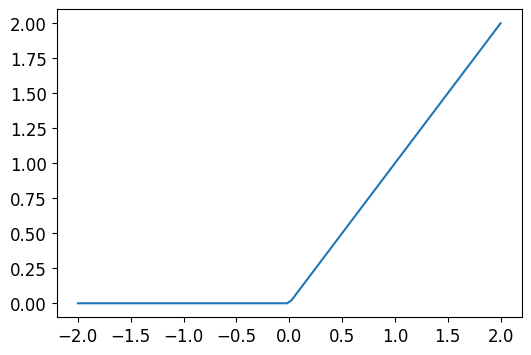

In [ ]:
plot_function(F.relu)

Two linear layers added together result in one linear layer, so we can stack as many layers on top of each other, without a non linear function between them, it is the same as one layer.

By having our model have more layers we can do more complex computation, and therefore model more complex functions, but there is no point oin doing this as multiplying things multiple times and adding them up multiple times can be replaced by multiplying different things together and once and adding them up just once just as explained above.

But if we put a non linear layer between them, then this is no longer true meaning each layer can do their own work as they are decoupled from the other layers.

Interestingly, it can be mathematically proven that this little function can solve any computable problem to an abirtary high level of accuracy if we can find the right values of w1 and w2 and make the matrices big enough.

The three lines of code in the simple_net each represent layers.The first and third layers being the linear layers, while the second line is know as a non -linearity or an activation function.

By taking advantange of PyTorch we can replace the lines of code with some simpler easier to understand code

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

nn.Sequential creates a module that calls each of the listed layers or functions in turn.

nn.ReLu is also a PyTorch module that does the same thing as the F.relu function. Most functions appearing in a model also have identical form that are modules.

nn.Sequential requires us to use the module version and since modules are classes, we have to instantiate them such as nn.ReLU().

nn.Sequential is a module, so we can get its parameters, which return a list of all the parameters of all the modules it contains. So lets try it out, we give our model a lower learning rate and more epochs as it is a deeper model.

In [ ]:
learn = Learner(dls, simple_net,opt_func=SGD,loss_func=mnist_loss,metrics=batch_accuracy)

In [ ]:
learn.fit(20,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.217813,0.090105,0.965653,00:01
1,0.105636,0.054094,0.968597,00:01
2,0.065732,0.044427,0.970559,00:01
3,0.048368,0.039606,0.971541,00:00
4,0.038764,0.036749,0.972522,00:00
5,0.033835,0.034544,0.973013,00:00
6,0.030377,0.032891,0.975466,00:00
7,0.028272,0.031579,0.976448,00:00
8,0.026999,0.030358,0.976938,00:00
9,0.025535,0.029610,0.976448,00:00


The training process is recorded in learn.recoder with the outputs stored in the values attribute.

We can plot the accuracy over training as shown below

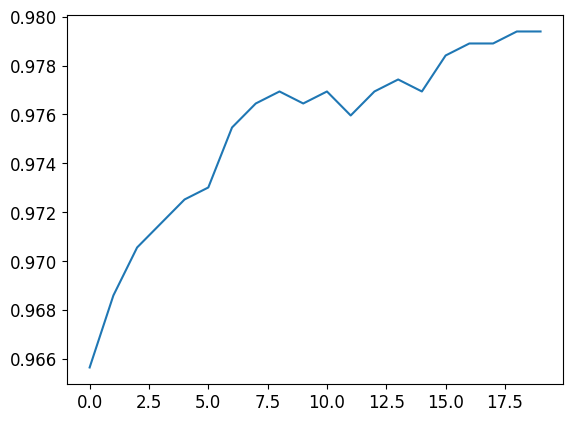

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
#final accuracy
learn.recorder.values[-1][2]

0.9793915748596191

We now have
1. A function that can solve any problem to any given level of accuracy (neural network) given the correct set of parameters.
2.  A way to find the best parameters for any given function (Stochastic Gradient Descent).

To Quote Jeremy Howard/Sylvain

This is why deep learning can do things which seem rather magical, such fantastic things.
Believing that this combination of simple techniques can really solve any problem is one of the
biggest steps that we find many students have to take. It seems too good to be true—surely
things should be more difficult and complicated than this?

We can build deeper models and add up as many layers as we want, as long there is a non-linearity between the linear layers. In practice the deeper a model is, the harder the parameters are to optimize.

If two linear layers with a single linearity are enough to approximate any given function, they why use deeper models.Turns out if we use deeper models, we need less paramters which results in smaller matrices with more layers and get better results than using large matrices with few layers.

This means we can train the model quicker and use less memory

In [ ]:
#lets compare our results from our simple net to using an 18 layer resnet model

dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
 loss_func=F.cross_entropy, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.074268,0.010681,0.997056,03:17


As you can see for the same dataset we got nearly 100% accuracy while using 1 epoch.That is some difference from our simple_net.

A neural network contains alot of numbers but they can be generally summed up into to.
- Numbers that are calculated by the linear and non-linear layers also called activations.
- Parameters that these numbers are calculated from i.e. w,b which are randomly chosen and optimized.
  

Fastai concept summary as quoted from the fastai book

|ReLU | Function that returns 0 for negative numbers and doesn't
change positive numbers
.
|Mini-batch | A small group of inputs and labels gathered together
in two arrays. A gradient descent step is updated on this batch
(rather than a whole epo
ch).
|Forward pass | Applying the model to some input and computing the
predic
tions.
|Loss | A value that represents how well (or badly) our m
del is

doing.
|Gradient | The derivative of the loss with respect to some
parameter of
the model.
|Backward pass | Computing the gradients of the loss with respect to
all model
 |arameters.
|Gradient descent | Taking a step in the directions opposite to the
gradients to make the model parameters a litt
le bit better.
|Learning rate | The size of the step we take when applying SGD to
update the parameters of the model.


In [ ]:
#reinitialize params
weights = init_params(28*28,1)
bias = init_params(1)
dl = DataLoader(dset, batch_size = 256, shuffle = True)

#what does first(dl) do
xb, yb = first(dl)
xb.shape, yb.shape

valid_dl = DataLoader(valid_dset, batch_size= 256, shuffle=True)

#Mini batch
batch = train_x[:4]
batch

train_labels_batch = train_y[:4]

valid_batch = valid_x[:4]
valid_batch

#linear1
def linear1(xb):
    return xb@weights + bias

#make predictions
preds = linear1(batch)
preds

loss = mnist_loss(preds, train_y[:4])
loss.backward()

weights.grad.shape, weights.grad.mean(), bias.grad

weights.grad.zero_()
bias.grad.zero_()

In [ ]:
def calc_grad(xb,yb,model):
    preds = model(xb)
    loss = mnist_loss(preds,yb)
    loss.backward()

def train_epoch(model, lr, params):
 for xb,yb in dl:
 calc_grad(xb, yb, model)
 for p in params:
 p.data -= p.grad*lr
 p.grad.zero_()

def batch_accuracy(xb, yb):
 preds = xb.sigmoid()
 correct = (preds>0.5) == yb
 return correct.float().mean()

Questionnaire
1. How is a grayscale image represented on a computer? How about a color image?
2. How are the files and folders in the MNIST_SAMPLE dataset structured? Why?
3. Explain how the "pixel similarity" approach to classifying digits works.
4. What is a list comprehension? Create one now that selects odd numbers from a list and
doubles them.
5. What is a "rank-3 tensor"?
6. What is the difference between tensor rank and shape? How do you get the rank from the
shape?
7. What are RMSE and L1 norm?
10/10/23, 11:21 PM Notebooks
https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb 53/54
8. How can you apply a calculation on thousands of numbers at once, many thousands of
times faster than a Python loop?
9. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the
bottom-right four numbers.
10. What is broadcasting?
11. Are metrics generally calculated using the training set, or the validation set? Why?
12. What is SGD?
13. Why does SGD use mini-batches?
14. What are the seven steps in SGD for machine learning?
15. How do we initialize the weights in a model?
16. What is "loss"?
17. Why can't we always use a high learning rate?
18. What is a "gradient"?
19. Do you need to know how to calculate gradients yourself?
20. Why can't we use accuracy as a loss function?
21. Draw the sigmoid function. What is special about its shape?
22. What is the difference between a loss function and a metric?
23. What is the function to calculate new weights using a learning rate?
24. What does the DataLoader class do?
25. Write pseudocode showing the basic steps taken in each epoch for SGD.
26. Create a function that, if passed two arguments [1,2,3,4] and 'abcd' , returns [(1,
'a'), (2, 'b'), (3, 'c'), (4, 'd')] . What is special about that output data
structure?
27. What does view do in PyTorch?
28. What are the "bias" parameters in a neural network? Why do we need them?
29. What does the @ operator do in Python?
30. What does the backward method do?
31. Why do we have to zero the gradients?
32. What information do we have to pass to Learner ?
33. Show Python or pseudocode for the basic steps of a training loop.
34. What is "ReLU"? Draw a plot of it for values from -2 to +2 .
35. What is an "activation function"?
36. What's the difference between F.relu and nn.ReLU ?
37. The universal approximation theorem shows that any function can be approximated as
closely as needed using just one nonlinearity. So why do we normally use more?


Difference between args and kwargs
Python class definition
reproduce jeremy results
